# Weather Warning - Data preprocessing

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import re
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

### 1. Integration and data cleaning

Firstly we import our data into *measurements* and *stations* dataframes.

In [2]:
measurements = pd.read_csv('measurements.csv', sep = '\t')

stations = pd.read_csv('stations.csv', sep = '\t')

In [3]:
measurements

,TEMP,Pb,C2H3NO5,SO2,CFCs,warning,PM10,latitude,O3,PRES,CH4,NOx,PAHs,longitude,H2CO,CO,PM2.5,NH3
0,11.63681,59.04929,0.04992,8.15174,33.76361,1.0,4.17615,8.35122,8.01685,1051.93040,12.09764,5.42988,8.36734,-62.64102,75.73743,6.63032,7.88810,7.24165
1,29.61423,57.37654,0.08302,6.85331,46.94613,1.0,6.97589,38.06084,8.48665,1193.67200,7.78226,8.77385,9.18997,-97.92977,45.75960,6.72084,7.84346,8.38619
2,22.38966,61.27853,0.07044,7.77907,52.72148,1.0,7.15149,-8.05389,8.86664,1103.81702,5.94096,7.58559,8.18342,-34.88111,52.68559,5.32123,8.32372,9.59674
3,23.93475,51.19713,0.19101,5.61192,30.15729,1.0,8.77098,35.74788,7.13248,1160.81796,5.94754,9.78942,11.52139,-95.36969,46.45811,7.00019,7.87748,8.57713
4,16.15213,38.59449,0.15357,9.07064,49.49594,0.0,8.58246,22.37066,7.90311,1165.57940,4.82733,3.38940,7.66910,114.10479,18.19979,10.53578,8.20174,9.11723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12140,-13.21662,52.13627,0.04593,8.15972,55.53244,1.0,6.47555,40.66482,7.49880,1132.63142,8.70868,6.37203,10.24854,122.22833,46.27524,7.16575,6.80504,8.96426
12141,7.64043,49.01147,0.06911,5.90777,73.44931,1.0,6.36459,-54.80000,7.31559,1131.29490,5.90811,11.89275,10.26355,-68.30000,44.77713,6.86538,9.13722,6.94239
12142,22.66901,49.32991,0.07646,7.34128,51.94318,0.0,7.47681,41.91738,7.36530,1159.24970,9.55866,7.49798,5.67403,3.16310,56.87669,6.35085,7.21536,6.97703
12143,28.25407,76.33083,0.02338,6.55931,49.76282,1.0,6.31297,-27.50578,8.29788,1054.01390,8.86257,10.15071,9.32797,153.10236,45.74586,6.01633,7.33594,6.30531


Based on the previous assignment we know that some of the attributes have very little to none correlation with other attributes and therefore we remove these attributes:
- TEMP (temperature)
- Pb (Lead)
- CFCs (Chlorofluorocarbons)
- O3 (Ozone)
- PRES (Atmospheric pressure)
- H2CO (Plywood emit formaldehyde)
- PM2.5 (Particulate Matter)
- NH3 (Ammonia trace)

We will keep attribute *longitude* and *latitude* for merging purposes with stations dataframe.

In [4]:
measurements.drop(['TEMP', 'Pb', 'CFCs', 'O3', 'PRES', 'H2CO', 'PM2.5', 'NH3'], 
                  axis = 1, inplace = True)

measurements

,C2H3NO5,SO2,warning,PM10,latitude,CH4,NOx,PAHs,longitude,CO
0,0.04992,8.15174,1.0,4.17615,8.35122,12.09764,5.42988,8.36734,-62.64102,6.63032
1,0.08302,6.85331,1.0,6.97589,38.06084,7.78226,8.77385,9.18997,-97.92977,6.72084
2,0.07044,7.77907,1.0,7.15149,-8.05389,5.94096,7.58559,8.18342,-34.88111,5.32123
3,0.19101,5.61192,1.0,8.77098,35.74788,5.94754,9.78942,11.52139,-95.36969,7.00019
4,0.15357,9.07064,0.0,8.58246,22.37066,4.82733,3.38940,7.66910,114.10479,10.53578
...,...,...,...,...,...,...,...,...,...,...
12140,0.04593,8.15972,1.0,6.47555,40.66482,8.70868,6.37203,10.24854,122.22833,7.16575
12141,0.06911,5.90777,1.0,6.36459,-54.80000,5.90811,11.89275,10.26355,-68.30000,6.86538
12142,0.07646,7.34128,0.0,7.47681,41.91738,9.55866,7.49798,5.67403,3.16310,6.35085
12143,0.02338,6.55931,1.0,6.31297,-27.50578,8.86257,10.15071,9.32797,153.10236,6.01633


Now we drop all NA values in warning column and all the duplicates.

In [5]:
measurements = measurements.dropna(axis = 0, subset = ['warning'])
measurements = measurements.drop_duplicates()
measurements.reset_index(drop=True, inplace=True)

In [6]:
measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11918 entries, 0 to 11917
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   C2H3NO5    11871 non-null  float64
 1   SO2        11870 non-null  float64
 2   warning    11918 non-null  float64
 3   PM10       11870 non-null  float64
 4   latitude   11918 non-null  float64
 5   CH4        11870 non-null  float64
 6   NOx        11870 non-null  float64
 7   PAHs       11871 non-null  float64
 8   longitude  11918 non-null  float64
 9   CO         11870 non-null  float64
dtypes: float64(10)
memory usage: 931.2 KB


### 1.1 Missing values

In [7]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   1034 non-null   object 
 1   latitude   1034 non-null   float64
 2   station    1034 non-null   object 
 3   QoS        1034 non-null   object 
 4   revision   1034 non-null   object 
 5   longitude  1034 non-null   float64
dtypes: float64(2), object(4)
memory usage: 48.6+ KB


There are none missing values in stations dataframe.

In [8]:
measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11918 entries, 0 to 11917
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   C2H3NO5    11871 non-null  float64
 1   SO2        11870 non-null  float64
 2   warning    11918 non-null  float64
 3   PM10       11870 non-null  float64
 4   latitude   11918 non-null  float64
 5   CH4        11870 non-null  float64
 6   NOx        11870 non-null  float64
 7   PAHs       11871 non-null  float64
 8   longitude  11918 non-null  float64
 9   CO         11870 non-null  float64
dtypes: float64(10)
memory usage: 931.2 KB


From the dataframe description we can see that most of the attributes have records with missing values. In the next part, we will try 2 different approaches of dealing with missing values. In the EDA we tried approach of removing those records and therefore we in this notebook we will try these approaches:
- replacing missing values with a mean
- replacing missing values with kNN algorithm

### 1.1.1 Replacing missing values with a mean

In [9]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(measurements)

measurements_mean = imputer.transform(measurements)
measurements_mean = pd.DataFrame(measurements_mean, columns = measurements.columns.values)

measurements_mean['warning'] = measurements['warning']

# can also be done easier like this
#mean_measurements = measurements.fillna(measurements.mean())
#mean_measurements.equals(measurements_mean)

measurements_mean.describe()

,C2H3NO5,SO2,warning,PM10,latitude,CH4,NOx,PAHs,longitude,CO
count,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000
mean,0.268251,7.118066,0.592801,7.144598,27.787955,7.868520,8.162188,8.683726,9.356252,7.115866
std,1.551445,1.906495,0.491333,1.827458,23.708618,1.901836,2.020542,1.825767,75.748349,1.607502
min,0.000000,0.983490,0.000000,0.000000,-54.800000,1.638740,0.895030,2.088970,-156.474320,1.602970
25%,0.049300,5.813937,0.000000,5.899590,13.658050,6.453090,6.738403,7.534013,-70.928660,6.013305
50%,0.069810,6.990200,1.000000,7.001305,34.864720,7.739085,8.222825,8.791280,9.204270,6.921730
75%,0.138537,8.270895,1.000000,8.262905,44.929340,9.236998,9.630615,9.934850,72.491540,8.053992
max,100.000000,15.135050,1.000000,15.217440,65.933810,15.483560,16.614320,15.426310,171.253640,13.303780


<AxesSubplot: >

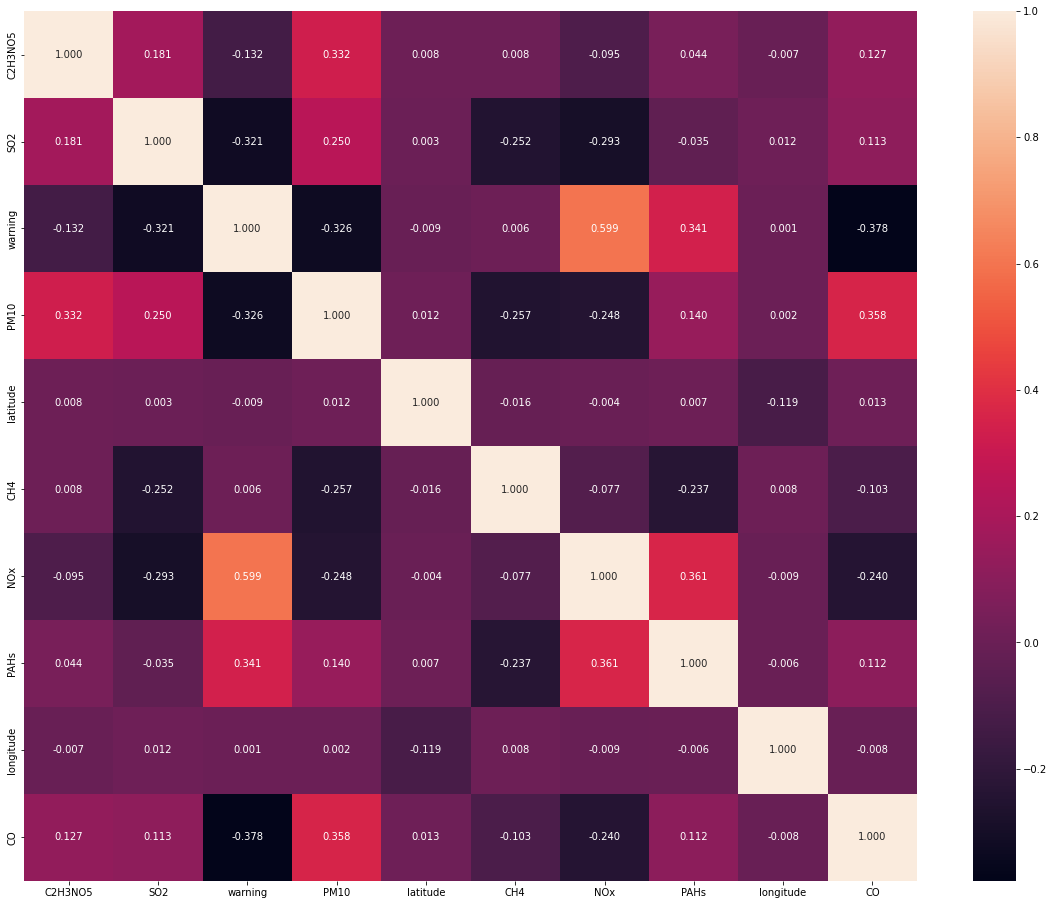

In [10]:
figure, ax = plt.subplots(figsize = (20,16))

sns.heatmap(measurements_mean.corr(), ax = ax, annot = True, fmt = ".3f")

### 1.1.2 Replacing missing values with kNN algorithm

In [11]:
imputer = KNNImputer()


imputer.fit(measurements)

measurements_knn = imputer.transform(measurements)
measurements_knn = pd.DataFrame(measurements_knn, columns = measurements.columns.values)

measurements_knn['warning'] = measurements['warning']


measurements_knn.describe()

,C2H3NO5,SO2,warning,PM10,latitude,CH4,NOx,PAHs,longitude,CO
count,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000
mean,0.267817,7.118958,0.592801,7.143802,27.787955,7.867903,8.161859,8.683542,9.356252,7.116367
std,1.551543,1.908364,0.491333,1.829235,23.708618,1.903241,2.022244,1.827054,75.748349,1.608806
min,0.000000,0.983490,0.000000,0.000000,-54.800000,1.638740,0.895030,2.088970,-156.474320,1.602970
25%,0.049240,5.812630,0.000000,5.897523,13.658050,6.450585,6.732753,7.528532,-70.928660,6.012455
50%,0.069580,6.981445,1.000000,6.989530,34.864720,7.729290,8.231165,8.800050,9.204270,6.917025
75%,0.136594,8.275890,1.000000,8.266955,44.929340,9.241803,9.633723,9.937407,72.491540,8.057913
max,100.000000,15.135050,1.000000,15.217440,65.933810,15.483560,16.614320,15.426310,171.253640,13.303780


<AxesSubplot: >

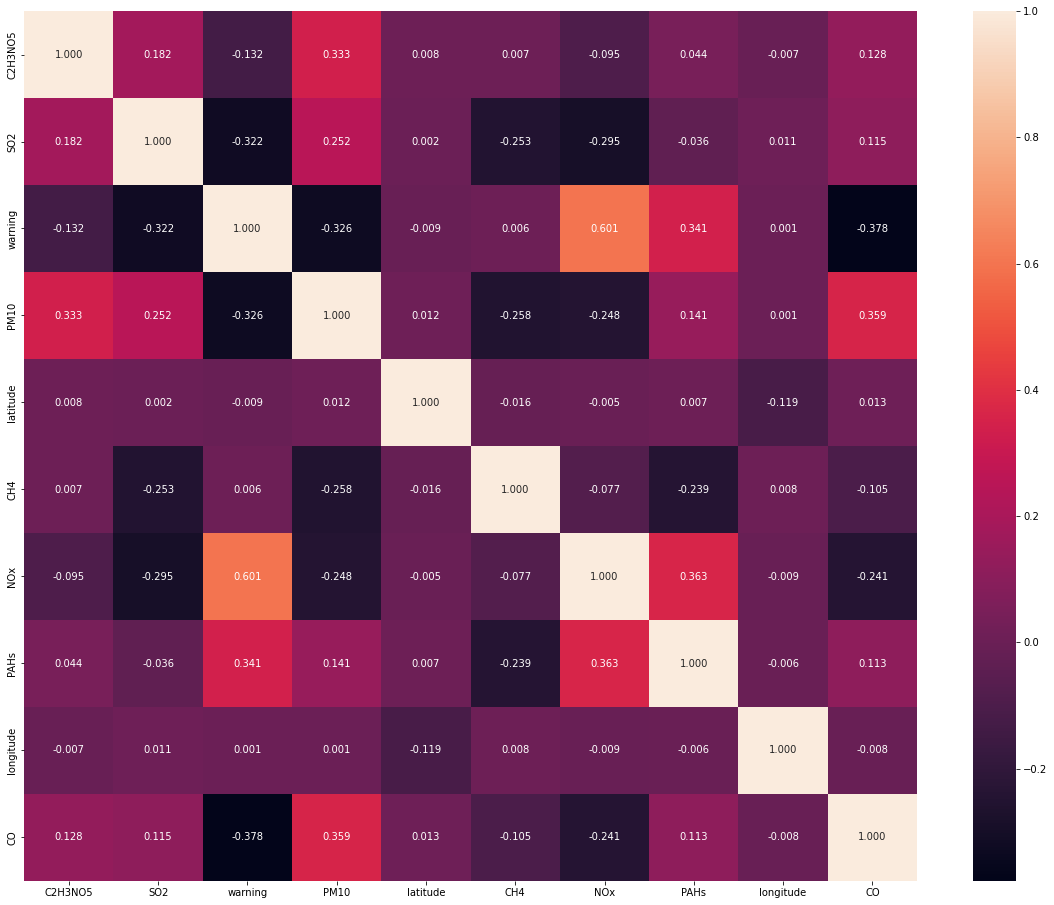

In [12]:
figure, ax = plt.subplots(figsize = (20,16))

sns.heatmap(measurements_knn.corr(), ax = ax, annot = True, fmt = ".3f")

Based on the differences between measurements dataset with missing values and the data with missing values replaced with mean or kNN algorithm we can see that there are slight changes in the correlations and also correlation of warning indicator is stronger when we used kNN. Data where we replaced missing values with average of each column has however higher amount of change in the correlations and is differs more from measurements data with missing values thus we will continue further with measurements dataset where we used kNN algorithm.

In [13]:
measurements = measurements_knn

### 1.2 Outliers detection

To detect outliers, we will make boxplots for each of the measurements attributes except *longitude*, *latitude* and *warning*.

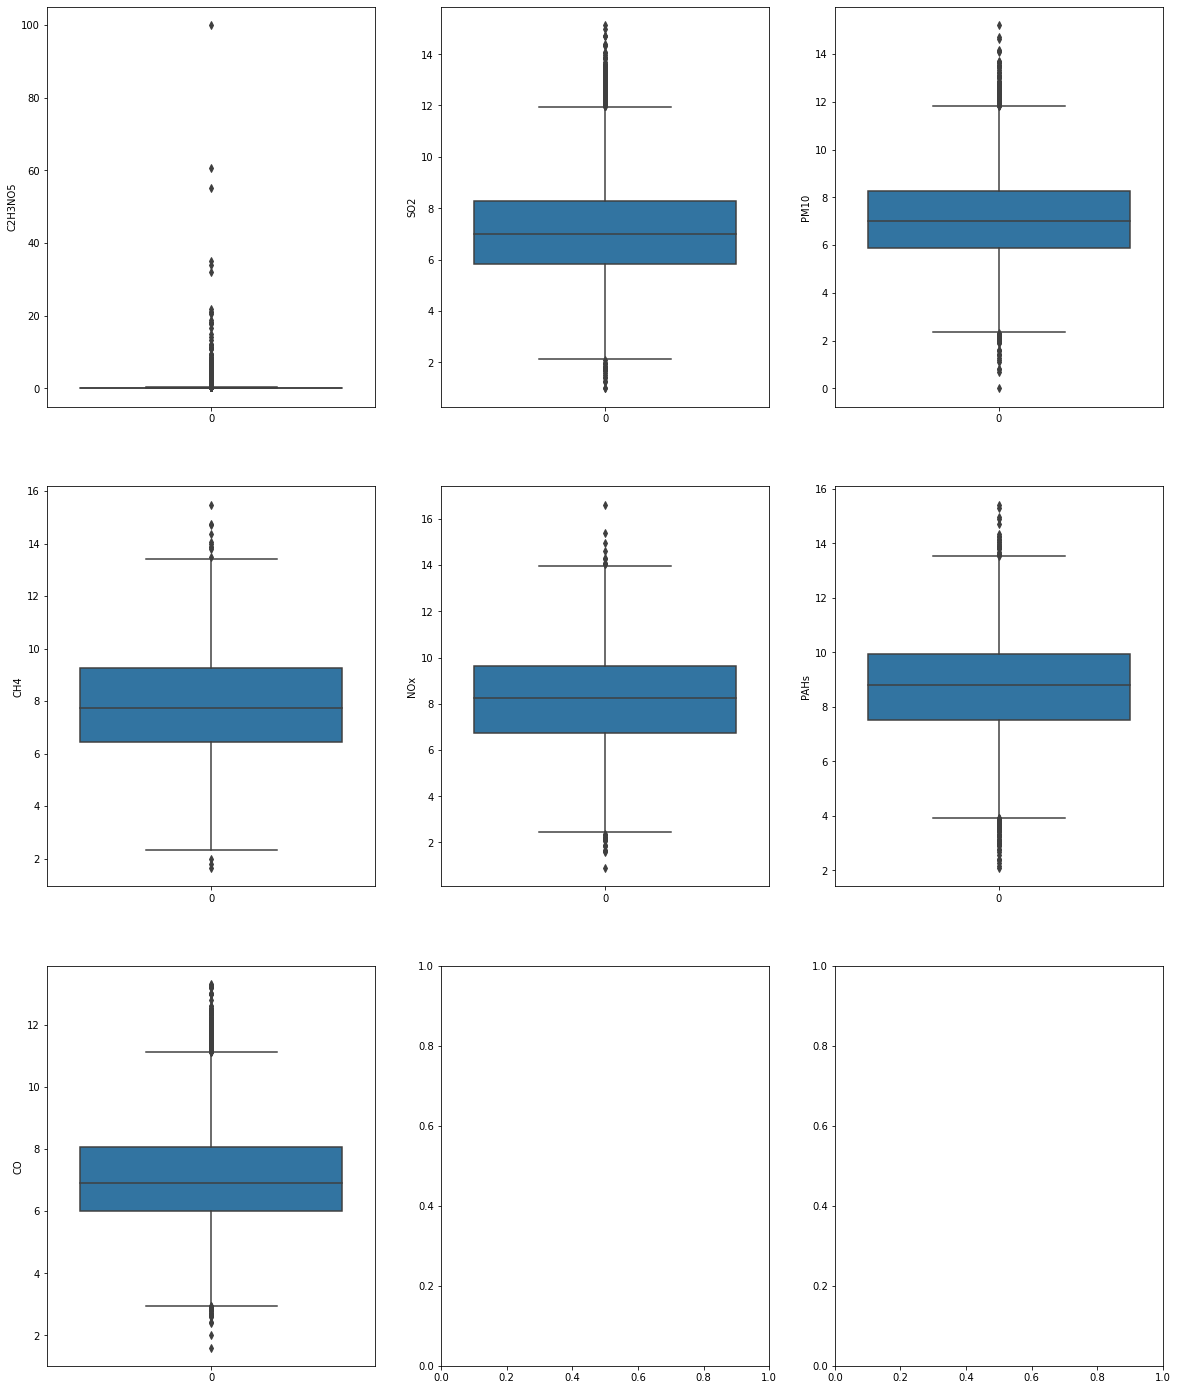

In [14]:
figure, axes = plt.subplots(3, 3 ,figsize = (20,25))

r, c = 0, 0
for column in measurements:
    if column not in ['warning', 'longitude', 'latitude']:
        sns.boxplot(measurements[column], ax = axes[r // 3][c % 3]).set(ylabel = column)
        c += 1
        r += 1

In [15]:
measurements.describe()

,C2H3NO5,SO2,warning,PM10,latitude,CH4,NOx,PAHs,longitude,CO
count,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000
mean,0.267817,7.118958,0.592801,7.143802,27.787955,7.867903,8.161859,8.683542,9.356252,7.116367
std,1.551543,1.908364,0.491333,1.829235,23.708618,1.903241,2.022244,1.827054,75.748349,1.608806
min,0.000000,0.983490,0.000000,0.000000,-54.800000,1.638740,0.895030,2.088970,-156.474320,1.602970
25%,0.049240,5.812630,0.000000,5.897523,13.658050,6.450585,6.732753,7.528532,-70.928660,6.012455
50%,0.069580,6.981445,1.000000,6.989530,34.864720,7.729290,8.231165,8.800050,9.204270,6.917025
75%,0.136594,8.275890,1.000000,8.266955,44.929340,9.241803,9.633723,9.937407,72.491540,8.057913
max,100.000000,15.135050,1.000000,15.217440,65.933810,15.483560,16.614320,15.426310,171.253640,13.303780


In [16]:
def identify_outliers(attribute):
    lower_bound = attribute.quantile(0.25) - 1.5 * stats.iqr(attribute)
    upper_bound = attribute.quantile(0.75) + 1.5 * stats.iqr(attribute)
    
    return attribute[(attribute > upper_bound) | (attribute < lower_bound)]

for column in measurements:
    if column not in ['warning', 'longitude', 'latitude']:
        print(column, "", len(identify_outliers(measurements[column])))

C2H3NO5  1695
SO2  174
PM10  141
CH4  13
NOx  27
PAHs  103
CO  192


As we can see most of the outliers are in the *C2H3NO5* attribute. We will compare 2 approaches of dealing with outlier values:
- replacment of outliers with 5% (95%) value
- removal of outlier values

### 1.2.1 Outlier values replaced with 5% and 95% quantile value

We will identify outliers in every attribute except *warning*, *longitude* and *latitude*.

In [17]:
def replace_outliers_5_95(attribute):
    lower_bound_value = np.percentile(attribute, 5)
    upper_bound_value = np.percentile(attribute, 95)
    
    lower_bound = attribute.quantile(0.25) - 1.5 * stats.iqr(attribute)
    upper_bound = attribute.quantile(0.75) + 1.5 * stats.iqr(attribute)
    
    attribute[attribute < lower_bound] = lower_bound_value
    attribute[attribute > upper_bound] = upper_bound_value
    
    return attribute

measurements_outliers_5_95 = measurements.copy()

for column in measurements:
    if column not in ['warning', 'longitude', 'latitude']:
        measurements_outliers_5_95[column] = replace_outliers_5_95(measurements_outliers_5_95[column])
        
measurements_outliers_5_95.describe()

,C2H3NO5,SO2,warning,PM10,latitude,CH4,NOx,PAHs,longitude,CO
count,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000,11918.000000
mean,0.189655,7.096231,0.592801,7.130217,27.787955,7.866036,8.163545,8.691286,9.356252,7.096877
std,0.274930,1.829907,0.491333,1.764828,23.708618,1.894608,2.005900,1.782184,75.748349,1.543000
min,0.000000,2.124620,0.000000,2.372440,-54.800000,2.338130,2.430860,3.930240,-156.474320,2.949820
25%,0.049240,5.812630,0.000000,5.897523,13.658050,6.450585,6.732753,7.528532,-70.928660,6.012455
50%,0.069580,6.981445,1.000000,6.989530,34.864720,7.729290,8.231165,8.800050,9.204270,6.917025
75%,0.136594,8.275890,1.000000,8.266955,44.929340,9.241803,9.633723,9.937407,72.491540,8.057913
max,0.855190,11.941260,1.000000,11.813090,65.933810,13.421570,13.968760,13.540040,171.253640,11.117160


<AxesSubplot: >

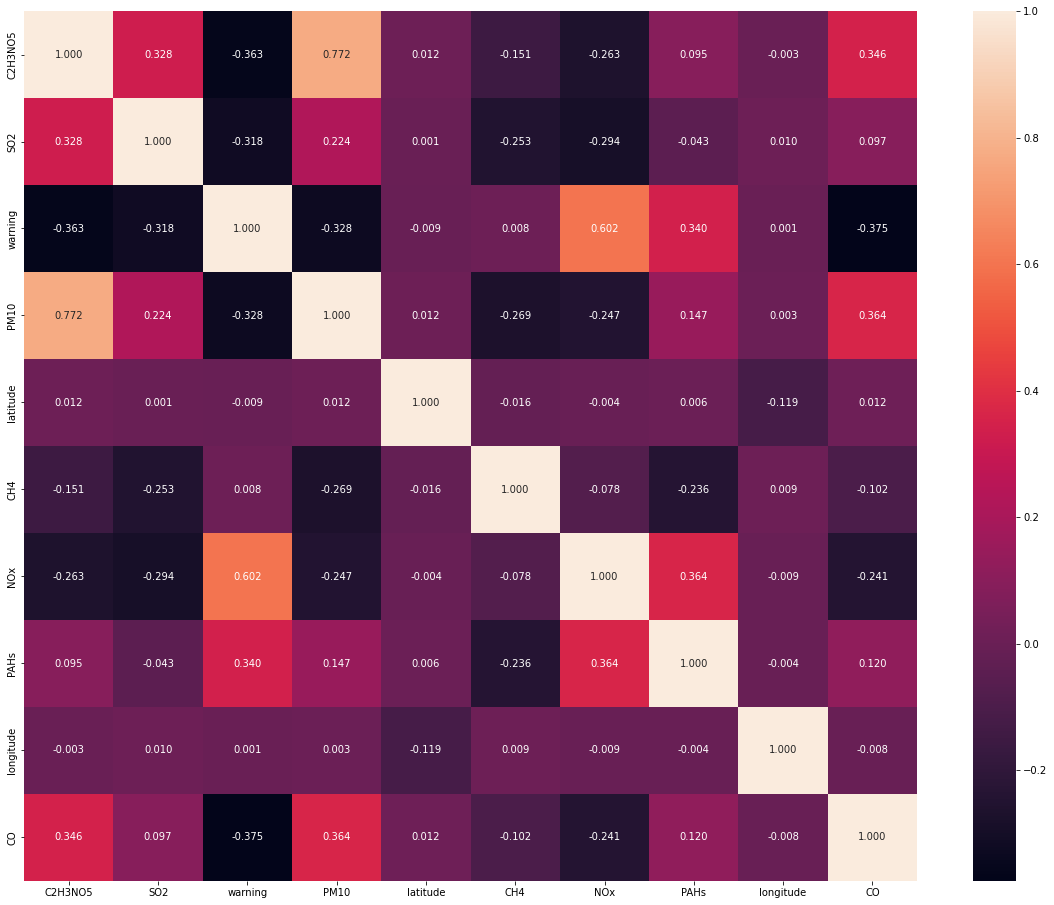

In [18]:
figure, ax = plt.subplots(figsize = (20,16))

sns.heatmap(measurements_outliers_5_95.corr(), ax = ax, annot = True, fmt = ".3f")

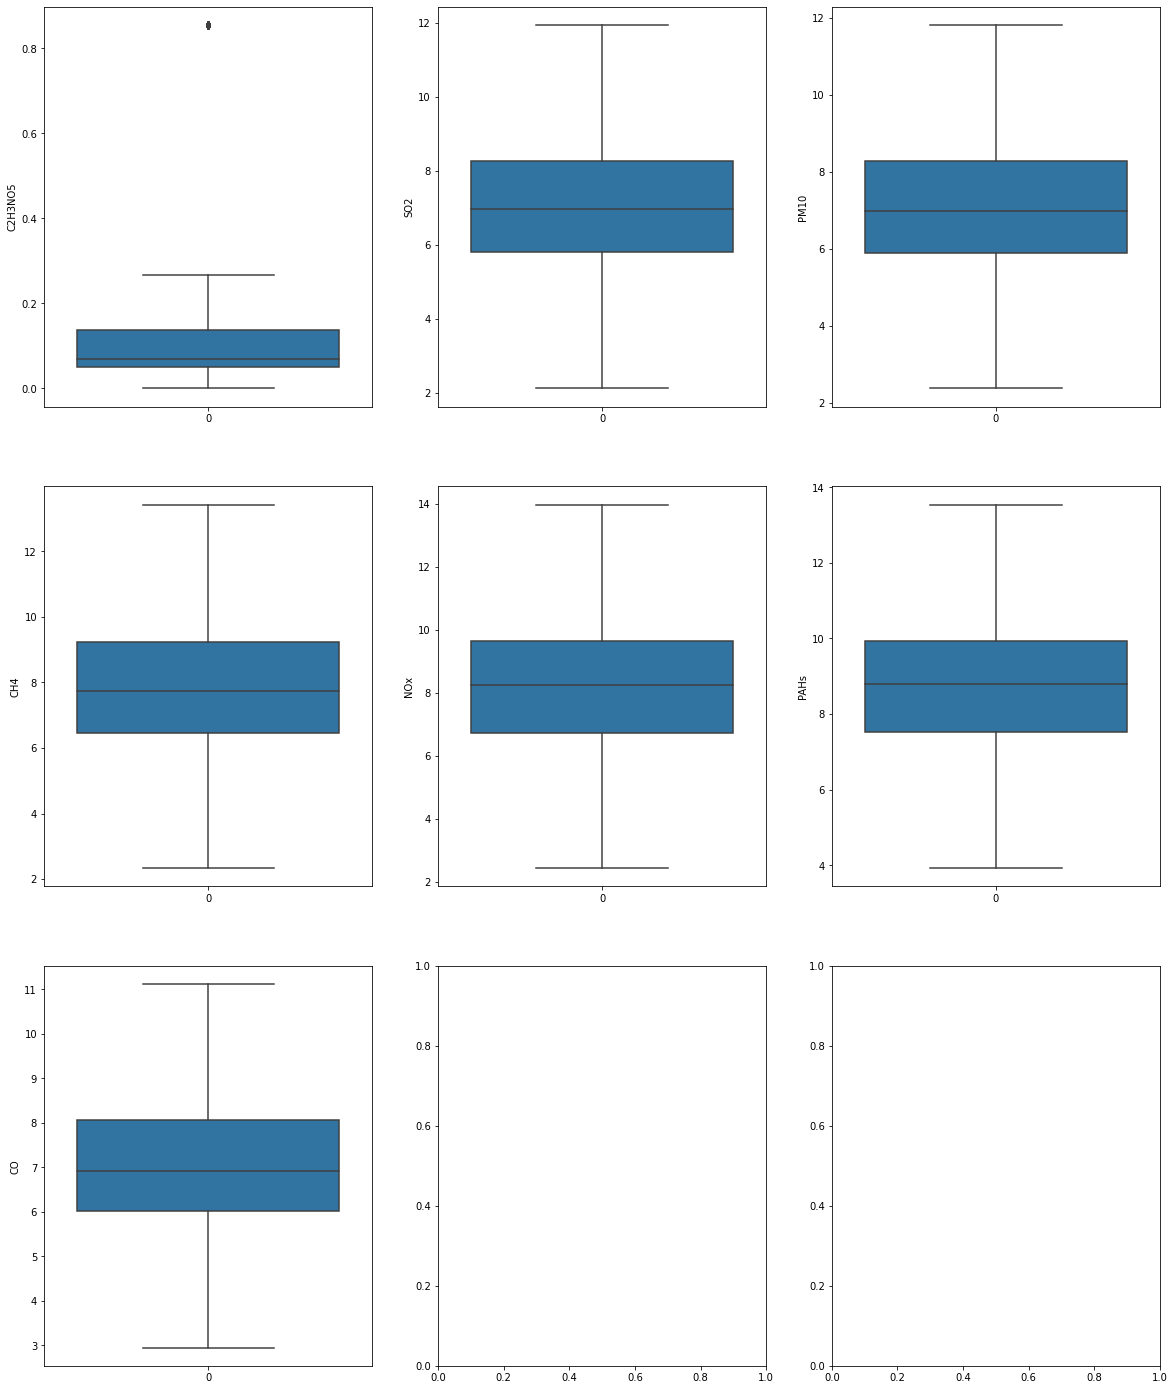

In [19]:
figure, axes = plt.subplots(3, 3 ,figsize = (20,25))

r, c = 0, 0
for column in measurements_outliers_5_95:
    if column not in ['warning', 'longitude', 'latitude']:
        sns.boxplot(measurements_outliers_5_95[column], ax = axes[r // 3][c % 3]).set(ylabel = column)
        c += 1
        r += 1

Based on new set of boxplots we can see that we got rid of most outliers, however few new outlier values were made in *C2H3NO5* attribute even though it's not a lot of them.

In [ ]:
sns.pairplot(measurements_outliers_5_95, vars = ['C2H3NO5', 'SO2', 'PM10', 'CH4', 'NOx', 'PAHs', 'CO'],
              hue="warning", diag_kind="kde")

Pairplot has shown us that this approach has proven to be good one in all attributes except one - *C2H3NO5*. We think it's because of extreme outlier values in this attribute and therefore we will try to remove extreme outliers first from this attribute and then do this approach again. We will consider extreme outliers as data points which are below/above Q1 - 3*IQR or Q3 + 3*IQR.

In [ ]:
measurements['C2H3NO5'].describe()

In [ ]:
def identify_extreme_outliers(attribute):
    lower_bound = attribute.quantile(0.25) - 3 * stats.iqr(attribute)
    upper_bound = attribute.quantile(0.75) + 3 * stats.iqr(attribute)
    
    return attribute[(attribute > upper_bound) | (attribute < lower_bound)]

len(identify_extreme_outliers(measurements['C2H3NO5']))

We can see that we found 1 221 of extreme outliers values, now we will remove them.

In [ ]:
measurements_outliers_5_95_extreme = measurements.drop(identify_extreme_outliers(measurements['C2H3NO5']).index)

measurements_outliers_5_95_extreme.describe()

Maximum of the *C2H3NO5* attribute has changed significantly, which is good as there was a maximum of 100 previously which is unrealistic. Now we will again replace outliers with 5% or 95% values.

In [ ]:
for column in measurements_outliers_5_95_extreme:
    if column not in ['warning', 'longitude', 'latitude']:
        measurements_outliers_5_95_extreme[column] = replace_outliers_5_95(measurements_outliers_5_95_extreme[column])
        
measurements_outliers_5_95_extreme.describe()

In [ ]:
sns.pairplot(measurements_outliers_5_95_extreme, vars = ['C2H3NO5', 'SO2', 'PM10', 'CH4', 'NOx', 'PAHs', 'CO'],
             hue="warning", diag_kind="kde")

However, after looking at the pairplot we can see this did not fix our problem with *C2H3NO5* attribute and therefore we will try different approaches as well.

### 1.2.2 Outlier values are removed

Because in 1.2.1 we found out that replacement is a good approach for most of the attributes, we will try to remove only outliers only in the *C2H3NO5* and *CO* attribute. (We chose for CO attribute to remove as well because of its amount of outlier values)

In [ ]:
measurements_outliers_removed = measurements.drop(identify_outliers(measurements['C2H3NO5']).index)
measurements_outliers_removed = measurements_outliers_removed.drop(identify_outliers(measurements_outliers_removed['CO']).index)
measurements_outliers_removed.describe()

In [ ]:
figure, ax = plt.subplots(figsize = (20,16))

sns.heatmap(measurements_outliers_removed.corr(), ax = ax, annot = True, fmt = ".3f")

Correlation between many of the attributes has been alternated more than when we replaced the outlier values with 5% (95%) value.

In [ ]:
sns.pairplot(measurements_outliers_removed, vars = ['C2H3NO5', 'SO2', 'PM10', 'CH4', 'NOx', 'PAHs', 'CO'],
             hue="warning", diag_kind="kde")

Pairplot however looks much better than when we replaced values. 

### 1.2.3 Conclusion

Because removal of outliers is generally not a good practice, we tried to replace those values with 5% and 95% values which fixed outlier problem in all but *C2H3NO5* attribute. We also tried 10% and 90% but it did not fix the problem. However, in second part we tried to remove outliers from this attribute. This fixed the graph problem and therefore we will proceed with this change to attribute data:
- for attribute *C2H3NO5* we will drop all outliers
- for every other attribute (except warning, longitude and latitude) we will replace outliers with 5% and 95% values 

In [ ]:
for column in measurements_outliers_removed:
    if column not in ['warning', 'longitude', 'latitude', 'C2H3NO5', 'CO']:
        measurements_outliers_removed[column] = replace_outliers_5_95(measurements_outliers_removed[column])
        
measurements_outliers_removed.describe()

In [ ]:
figure, ax = plt.subplots(figsize = (20,16))

sns.heatmap(measurements_outliers_removed.corr(), ax = ax, annot = True, fmt = ".3f")

In [ ]:
sns.pairplot(measurements_outliers_removed, vars = ['C2H3NO5', 'SO2', 'PM10', 'CH4', 'NOx', 'PAHs', 'CO'],
            hue="warning", diag_kind="kde")

Based on this new set of pair plots we can see that all the graphs with *C2H3NO5* are now looking better while we still kept the data from other records because we only replaced some values. Therefore we will further work with this version of data.

In [ ]:
measurements = measurements_outliers_removed
measurements.reset_index(drop=True, inplace=True)

measurements.describe()

### 1.3 Stations dataset

Most of the problems were fixed already in previous notebook and therefore we'll just use code from there.

In [ ]:
# replacing misspelled QoS
stations['QoS'] = stations['QoS'].replace('accep', 'acceptable')
stations['QoS'] = stations['QoS'].replace('maitennce', 'maintenance')

# 'YYYY/MM/DD' fix
stations['revision'] = stations['revision'].map(lambda date: re.sub(pattern = r"^\d{4}\/\d{2}\/\d{2}$",
                                                                    repl = date.replace('/', '-'), 
                                                                    string = date))
# 'MM/DD/YYYY, HH:MM:SS' fix
stations['revision'] = stations['revision'].map(lambda date: re.sub(pattern = r"^\d{2}\/\d{2}\/\d{4}, \d{2}:\d{2}:\d{2}$", 
                                                                    repl = date[6:10] + '-' + date[0:2] + '-' + date[3:5], 
                                                                    string = date))
# dictionary for mapping months name into its number
months = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12'
}

# 'DD Month YYYY' fix
stations['revision'] = stations['revision'].map(lambda date: re.sub(pattern = r"^\d{2} [A-Z][a-z]{2} \d{4}$", 
                                                                    repl = date[7:] + '-' + str(months.get(date[3:6])) + '-' + date[0:2], 
                                                                    string = date))

# make a new columns by splitting locality attribute
stations[['region', 'locality']] = stations['location'].str.split('/', n = 1, expand = True)

# drop the old column
stations.drop('location', inplace = True, axis = 1)
stations

Later, we will merge stations and measurements data together, however we have to remove *QoS* and *revision* attribute, because we don't have time of measurement and thus there would be duplicated and wrong records.

In [ ]:
stations.drop(columns = ['revision', 'QoS'], inplace = True)

In [ ]:
stations.drop_duplicates(inplace = True)

stations.reset_index(drop = True, inplace = True)

stations

### 1.4 Merging

Because stations dataset has only categorical data and we are merging based on *longitude* and *latitude* attributes, we will only put index of the station into the measurements dataset.

In [ ]:
stations['station_index'] = stations.index

# merge of the measurements and stations dataframes 
merged = pd.merge(measurements, stations, how = 'left', left_on = ['latitude', 'longitude'], right_on = ['latitude', 'longitude'])

#delete of station_index column
stations.drop(columns = ['station_index'], inplace = True)

# delete of duplicated values
merged.drop_duplicates(inplace = True)
merged.drop(columns = ['station', 'region', 'locality'], inplace = True)

merged

As a next step we can remove *latitude* and *longitude* attribute as we don't need it anymore because we have index of the station.

In [ ]:
merged.drop(columns = ['longitude', 'latitude'], inplace = True)

merged

### 2. Data preprocessing

Firstly, we will split our dataset into train and test subsets in 4:1 ratio -  80% of records will be in train dataset and 20% in the testing dataset.

In [ ]:
merged.info()

In [ ]:
train_data, test_data = train_test_split(merged, test_size=0.2)

train_data.reset_index(drop = True, inplace = True)
test_data.reset_index(drop = True, inplace = True)

print("Number of records in training data: ", len(train_data))
print("Number of records in test data: ", len(test_data))

In [ ]:
train_data

In [ ]:
figure, axes = plt.subplots(3, 3 ,figsize = (20,25))

r, c = 0, 0
for column in train_data.columns.values:
    if column not in ['warning', 'station_index']:
        sns.histplot(train_data[column], ax = axes[r // 3][c % 3], bins=15).set(ylabel = column)
        c += 1
        r += 1

### 2.2 Data transforming

To see which data to transform, we will plot histograms and print skewness of each distribution curve.

In [ ]:
for column in train_data:
    if column not in ['warning', 'station_index']:
        print(column + (15-len(column))*' ', stats.skew(train_data[column]))

We will transform only attributes with high skewness (skewness > 1 or < -1) or moderate skewness (skewness > 1/2 or < 1/2). As we can see, we will transform only 1 attribute - already problematic *C2H3NO5*. We will user PowerTransformer for this.

In [ ]:
power = PowerTransformer(method='yeo-johnson', standardize=True)

train_data['C2H3NO5'] = pd.DataFrame(power.fit_transform(train_data[['C2H3NO5']])).values

sns.histplot(train_data['C2H3NO5'], kde = True, bins = 15)

In [ ]:
stats.skew(train_data['C2H3NO5'])

After power transforming the data we can see that distribution has rapidly changed it's skewness. Distribution is still not ideal, but much better than before the transformation.

### 2.2 Data scaling

To determine if we need to scale data we will print range of values for each column, histograms and skewness.

In [ ]:
for column in train_data.columns.values:
    if column not in ['warning', 'station_index']:
        print(column + (15-(len(column)))*' ', "min:", min(train_data[column]), " max:", max(train_data[column]))

In [ ]:
figure, axes = plt.subplots(3, 3 ,figsize = (20,25))

r, c = 0, 0
for column in train_data.columns.values:
    if column not in ['warning', 'longitude', 'latitude', 'station_index']:
        sns.histplot(train_data[column], ax = axes[r // 3][c % 3], bins=15, kde = True).set(ylabel = column)
        c += 1
        r += 1

In [ ]:
for column in train_data:
    if column not in ['warning', 'station_index']:
        print(column + (15-len(column))*' ', stats.skew(train_data[column]))

Ranges of the values for each of the columns are quite similar except few attributes like *C2H3NO5*, *SO2*, *PM10* and *CO*. The skewness has also shown us that we don't have any even mildly skewed distributions. However, because ML models work best with uniform values we will use MinMaxScales to transform these values into range [0, 1]. We will not scale *warning* and *station_index* attribute.

In [ ]:
scaler = MinMaxScaler()

scaled = pd.DataFrame(scaler.fit_transform(train_data[['C2H3NO5', 'SO2', 'PM10', 'CH4', 'NOx', 'PAHs', 'CO', 'station_index']])
                      , columns = ['C2H3NO5', 'SO2', 'PM10', 'CH4', 'NOx', 'PAHs', 'CO', 'station_index'])

scaled.describe()

MinMax scaler did its job and now we have uniform values in range of [0, 1]. Standard deviations are also quite similar. We will put those data into train data.

In [ ]:
train_data[['C2H3NO5', 'SO2', 'PM10', 'CH4', 'NOx', 'PAHs', 'CO', 'station_index']] = scaled.values
train_data

In [ ]:
figure, ax = plt.subplots(figsize = (20,16))

sns.heatmap(train_data.corr(), ax = ax, annot = True, fmt = ".3f")

Correlations between attributes (and mainly with attribute *warning*) thankfully did not change significantly. However, one new strong correlation has shown up between *C2H3NO5* and *PM10* ( 0.849 ).

### 3. Feature selection

For feature selection we will do 2 approaches:
- reading the heatmap
- recursive feature elimination


### 3.1 Heatmap results

Based on the heatmap made in previous chapter we can see that our *warning* indicater correlates with more attributes:
- moderate correlations: *NOx* (strongest), *PAHs*
- weak correlations: *CO*

We can see and sort these correlations by their strength.


In [ ]:
abs(train_data.corr()['warning']).sort_values(ascending = False)

After printing correlations between each of the feature and *warning* indicator we can see that the strongest correlation is with *NOx* attribute (corr(NOx, warning) = 0.58), *PAHs* (corr(PAHs, warning) = 0.41) and *CO* (corr(CO, warning) = 0.26). Lowest correlation is with *station_index* , after that, the lowest correlation is with *CH4* attribute (corr(CH4, warning) = 0.04).

We decided to extract 3 - 5 best features, based on this heatmap and correlation result we choose attributes *NOx*, *PAHs*, *CO*, *C2H3NO5* and *SO2*.

### 3.2 Select from model

In this section we're going to try different approach on feature selection and that is letting a model choose the most important features in the dataset. For this type of method a simple model is usually user and therefore we chose for logistic regression. We're gonna fit this model on our features and set *warning* indicator as a target variable. After this we simply print coeficients which model calculated for each of the featueres, threshold that determined which features to extract. Last print shows boolean values with columns we should take into consideration (True) and which are not that important (False).

In [ ]:
selector = SelectFromModel(estimator=LogisticRegression()).fit(train_data.drop(columns = ['warning']), train_data['warning'])

print(selector.estimator_.coef_)
print(selector.threshold_)
print(selector.get_support())

After running we can see that the most important features are *NOx*, *PAHs* and *CO*. These 3 attributes were had also the strongest correlations with *warning* indicator.

To sum up these 2 approaches for feature selection, we decided to take into consideration only 3 strongest attributes like this model showed us, we won't take *CO* and *C2H3NO5* attributes into consideration because based on 3.1 they have weak correlation with *warning* indicator.

We will drop any other columns.

In [ ]:
train_data.drop(columns = ['PM10', 'CH4', 'station_index'], inplace = True)

train_data

Unfortunately, we did not finish this chapter any further because of errors we could not figure out.

### 6. Data exporting

In [ ]:
test_data.to_csv('test_data.csv')
train_data.to_csv('train_data.csv')